In [1]:
import pandas as pd
import numpy as np
import pickle
import json
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [17]:
pd.set_option('display.max_rows', 2000)
sns.set(rc={'figure.figsize': (15, 10)})
# %matplotlib inline

In [3]:
def get_missing(Series):
    
    nrow_df = df.shape[0]
    missing_values = round(df.isnull().sum() / nrow_df, 2).sort_values(ascending=False)
    
    return missing_values

In [132]:
def handle_dataframe(df):

    
    def extract_number_from_squares(x):
        if pd.isna(x):
            return x
        else:
            return float(x.split(' ')[0])
    
    
    def extract_floor(x):
        floor = x.split('/')[0]
        if floor.isdigit():
            return int(floor)
        else:
            return 0
        
                
    columns_order = [#'ид', 
                     'район', 'адрес', 
                     'вид',
                     'год постройки', 'материал', 
                     'этажность', 'этаж', 'тип квартиры', 'цена', 'общая площадь', 
                     'жилая', 'кухня', 'количество комнат', 'отделка', 'санузел', 
                     'балкон/лоджия', 'дата добавления', 'дата истечения']
    
    rename_columns = {#'ид': 'ID', 
                      'район': 'District', 
                      'адрес': 'Address', 
                      'вид': 'Sales_Type', 
                      'год постройки': 'Year_Building', 
                      'материал': 'Material', 
                      'этажность': 'Floors_In_Building', 
                      'этаж': 'Floor', 
                      'тип квартиры': 'Apartment_Type', 
                      'цена': 'Price', 
                      'общая площадь': 'Square_Total', 
                      'жилая': 'Square_Living', 
                      'кухня': 'Square_Kitchen', 
                      'количество комнат': 'Rooms_Number', 
                      'отделка': 'Apartment_Condition', 
                      'санузел': 'Bathroom_Type', 
                      'балкон/лоджия': 'Balcony_Loggia', 
                      'дата добавления': 'Date_Add', 
                      'дата истечения': 'Date_Expiration'}
    
    df[['общая площадь','кухня','жилая']] = df[['общая площадь','кухня','жилая']].applymap(extract_number_from_squares)    
        
#     df['год постройки'] = df['год постройки'].map(lambda x: 0 if pd.isna(x) else int(x))
    df['дата добавления'] = pd.to_datetime(df['дата добавления'], format='%d.%m.%Y %H:%M:%S')
    df['дата истечения'] = pd.to_datetime(df['дата истечения'], format='%d.%m.%Y')
    df['этаж'] = df['этаж/этажность'].map(extract_floor)
    df['цена'] = df['цена'] / 1000
        
    df.drop(['этаж/этажность', 'ид'], axis=1, inplace=True)
    
    df = df[columns_order]
    df = df.rename(columns = rename_columns)
    df['Is_Outlier'] = 0
    df['Outlier_Description'] = None
    
    return df

## So... let's go start.
Прежде всего следует отбросить квартиры, относящиеся к первичному рынку недвижимости, так как они не должны принимать участие в анализе.

In [133]:
df = handle_dataframe(pd.read_json('data.json', orient='index'))
df = df[df['Sales_Type'] == 'вторичное']
df.head()

,District,Address,Sales_Type,Year_Building,Material,Floors_In_Building,Floor,Apartment_Type,Price,Square_Total,Square_Living,Square_Kitchen,Rooms_Number,Apartment_Condition,Bathroom_Type,Balcony_Loggia,Date_Add,Date_Expiration,Is_Outlier,Outlier_Description
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4353796,советский район,Фрунзе проспект 126,вторичное,1975.0,кирпич,5,3,гостинка,1250.0,18.0,NaN,NaN,1,в хорошем состоянии,совмещенный,NaN,2020-03-15 10:29:07,2020-04-12,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4207812,советский район,Вершинина 7,вторичное,1996.0,кирпич,5,2,NaN,13900.0,200.0,NaN,NaN,4,в отличном состоянии,раздельный,"лоджия, остекление",2020-03-12 22:44:17,2020-06-10,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4398582,советский район,Источная 10,вторичное,2009.0,монолит,7,5,NaN,6900.0,81.4,NaN,NaN,3,в отличном состоянии,раздельный,лоджия,2020-03-15 10:29:09,2020-04-12,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4119652,советский район,Енисейская 4,вторичное,1987.0,кирпич,9,5,секционка,1750.0,33.0,NaN,NaN,2,в отличном состоянии,раздельный,NaN,2020-03-15 10:25:13,2020-05-27,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4368552,ленинский район,Заозерный переулок 16/2,вторичное,1972.0,кирпич,5,3,гостинка,1100.0,17.2,13.0,NaN,1,NaN,NaN,NaN,2020-03-15 10:07:04,2020-04-29,0,None


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9935 entries, https://www.tomsk.ru09.ru/realty?subaction=detail&id=4353796 to https://www.tomsk.ru09.ru/realty?subaction=detail&id=4249332
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   District             9935 non-null   object        
 1   Address              9935 non-null   object        
 2   Sales_Type           9935 non-null   object        
 3   Year_Building        8514 non-null   float64       
 4   Material             9849 non-null   object        
 5   Floors_In_Building   9935 non-null   int64         
 6   Floor                9935 non-null   int64         
 7   Apartment_Type       1943 non-null   object        
 8   Price                9935 non-null   float64       
 9   Square_Total         9935 non-null   float64       
 10  Square_Living        2869 non-null   float64       
 11  Square_Kitchen       3194 non-null   

## Анализ признаков без взаимодействий

In [8]:
df.columns.tolist()

['District',
 'Address',
 'Sales_Type',
 'Year_Building',
 'Material',
 'Floors_In_Building',
 'Floor',
 'Apartment_Type',
 'Price',
 'Square_Total',
 'Square_Living',
 'Square_Kitchen',
 'Rooms_Number',
 'Apartment_Condition',
 'Bathroom_Type',
 'Balcony_Loggia',
 'Date_Add',
 'Date_Expiration']

#  Price

In [36]:
print('Missing values:', sum(df['Price'].isna()))
df['Price'].describe()

Missing values: 0


count     9935.000000
mean      2973.312124
std       2276.827277
min        300.000000
25%       1717.500000
50%       2500.000000
75%       3500.000000
max      42000.000000
Name: Price, dtype: float64

Из описания признака видно, что наименьшей стоимостью является 300 т.р., медианной 2500 т.р., а наибольшим значением является 42000 т.р. (42 миллиона рублей)
<br>
Следует построить гистрограмму распределения

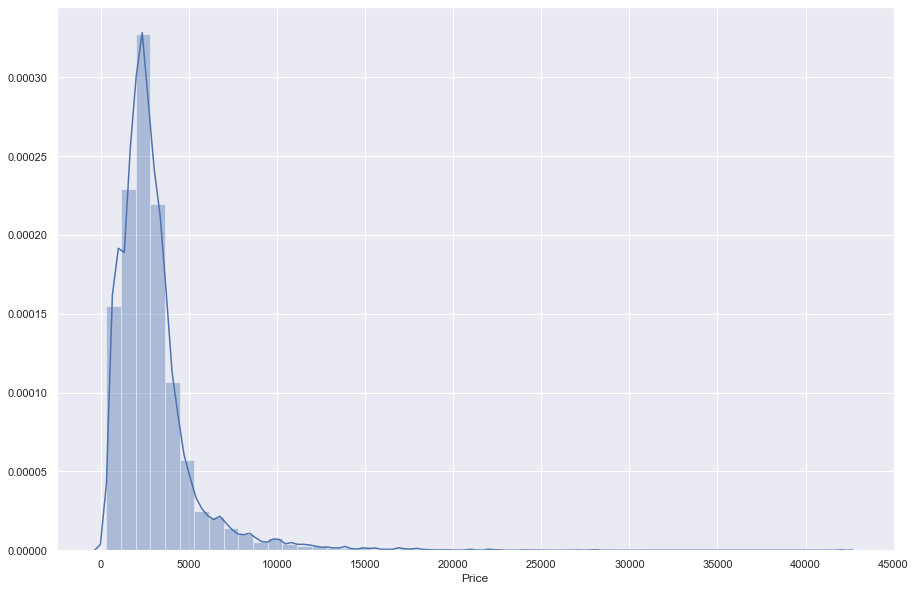

In [39]:
plot = sns.distplot(df['Price'])
plot.set_xticks(np.arange(0, 50000,5000))
plt.show()

Как и предполагалось, ряд имеет ярко выраженную ассиметрию. Эта ситуация весьма типична для рынка недвижимости, так как при большом количестве однородных квартир существует крайне малое количество дорогих квартир.


In [ ]:
# quantils = []
# values = []
# distr = []

# for j in df['District'].unique().tolist():
#     for i in np.arange(0, 1, 0.01):
#         values.append(df.loc[df['District'] == j, 'Price'].quantile(i))
#         quantils.append(i)
#         distr.append(j)

# plot = sns.lineplot(quantils, values, hue=distr)
# plot.set_xticks(np.arange(0, 1,0.05))
# plot.set_yticks(np.arange(0, 12000, 1000));

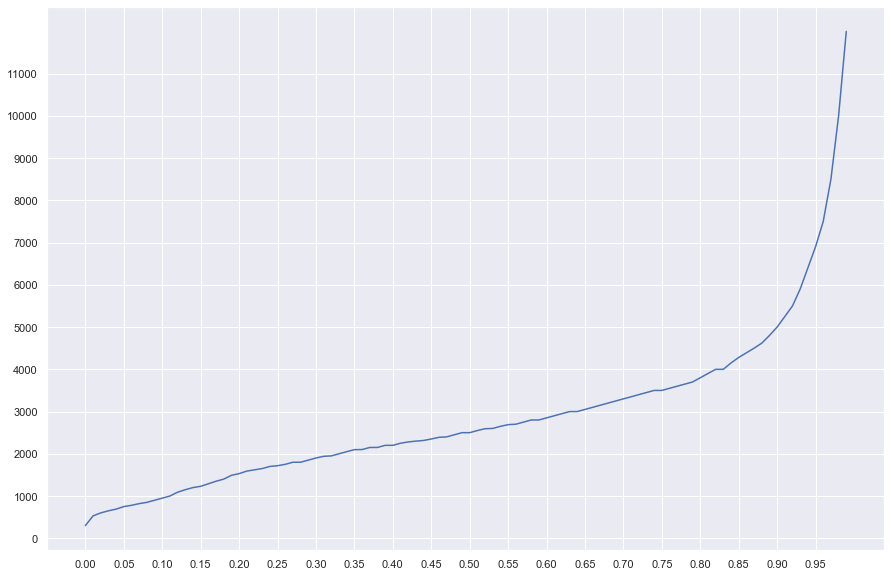

In [32]:
quantils = []
values = []

for i in np.arange(0, 1, 0.01):
    values.append(df['Price'].quantile(i))
    quantils.append(i)

plot = sns.lineplot(quantils, values)
plot.set_xticks(np.arange(0, 1,0.05))
plot.set_yticks(np.arange(0, 12000, 1000));

Как видно из графика, практически 90% квартир обладают стоимостью менее 5000 т.р. 
<br> 
В такой ситуации имеет место фильтрация данных, которая будет проводиться в дальнейшем

# Square_Total

In [95]:
print('Missing values:', sum(df['Square_Total'].isna()))
df['Square_Total'].describe()

Missing values: 0


count    9684.000000
mean       49.333177
std        28.567493
min         4.000000
25%        31.000000
50%        44.400000
75%        62.250000
max       410.000000
Name: Square_Total, dtype: float64

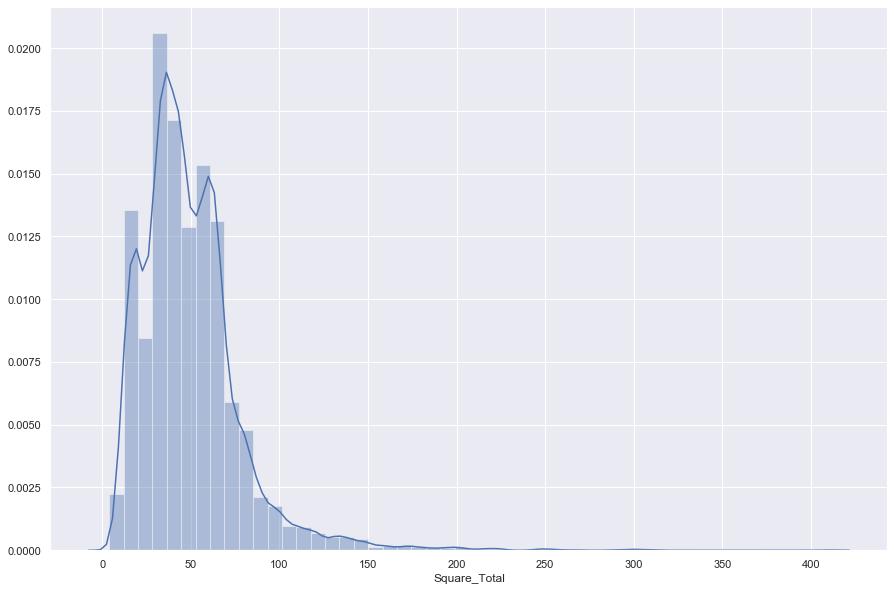

In [78]:
plot = sns.distplot(df['Square_Total'])
plot.set_xticks(np.arange(0, 450,50))
plt.show()

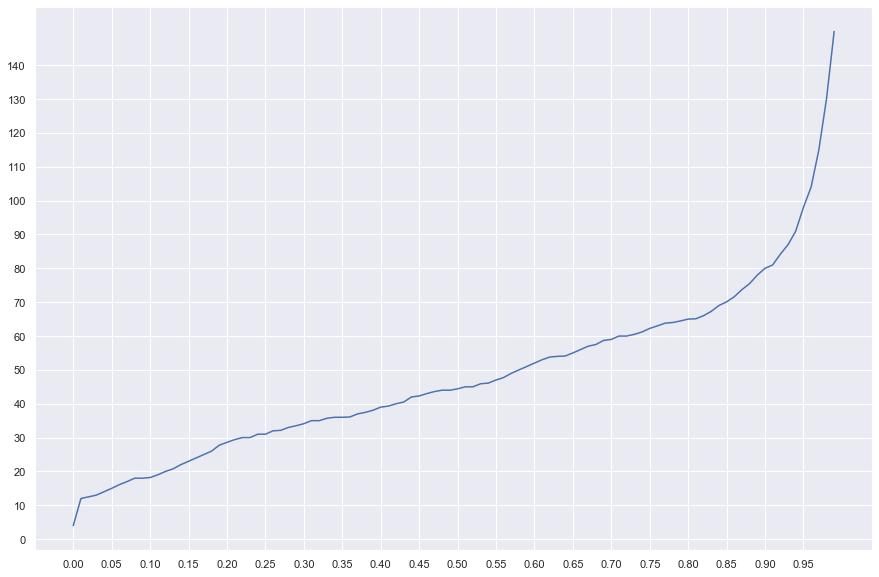

In [81]:
quantils = []
values = []

for i in np.arange(0, 1, 0.01):
    values.append(df['Square_Total'].quantile(i))
    quantils.append(i)

plot = sns.lineplot(quantils, values)
plot.set_xticks(np.arange(0, 1,0.05))
plot.set_yticks(np.arange(0, 150, 10));

Поведение признака Square_Total подобно признаку Price, так как именно Square_Total сильнее всего влияет на Price.

# Square_Kitchen

In [96]:
print('Missing values:', sum(df['Square_Kitchen'].isna()))
df['Square_Kitchen'].describe()

Missing values: 6559


count    3125.000000
mean        9.305485
std         4.000842
min         1.000000
25%         7.000000
50%         8.900000
75%        11.000000
max        45.000000
Name: Square_Kitchen, dtype: float64

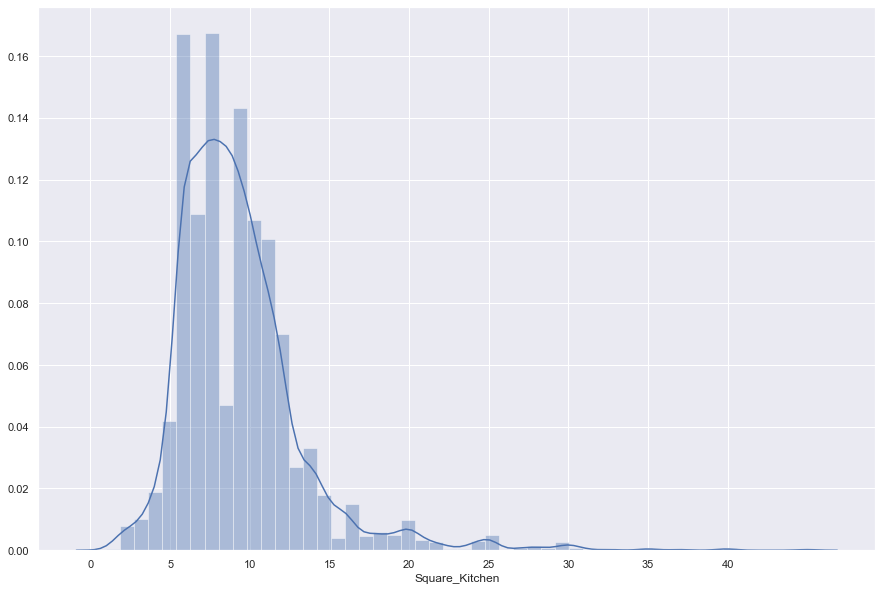

In [98]:
plot = sns.distplot(df['Square_Kitchen'])
plot.set_xticks(np.arange(0, 45,5))
plt.show()

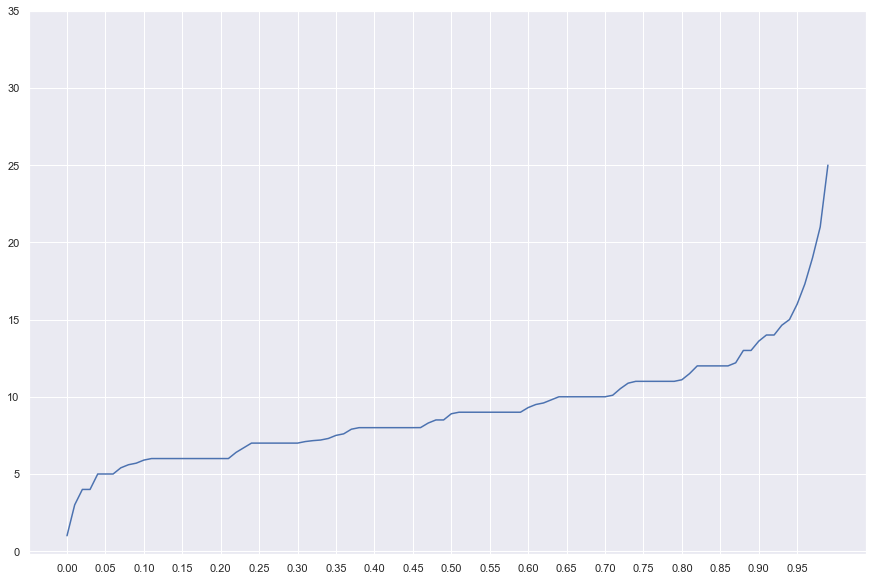

In [100]:
quantils = []
values = []

for i in np.arange(0, 1, 0.01):
    values.append(df['Square_Kitchen'].quantile(i))
    quantils.append(i)

plot = sns.lineplot(quantils, values)
plot.set_xticks(np.arange(0, 1,0.05))
plot.set_yticks(np.arange(0, 40, 5));

# Square_Living

In [101]:
print('Missing values:', sum(df['Square_Living'].isna()))
df['Square_Living'].describe()

Missing values: 6888


count    2796.000000
mean       32.907897
std        21.905629
min         0.000000
25%        18.000000
50%        30.000000
75%        40.000000
max       450.000000
Name: Square_Living, dtype: float64

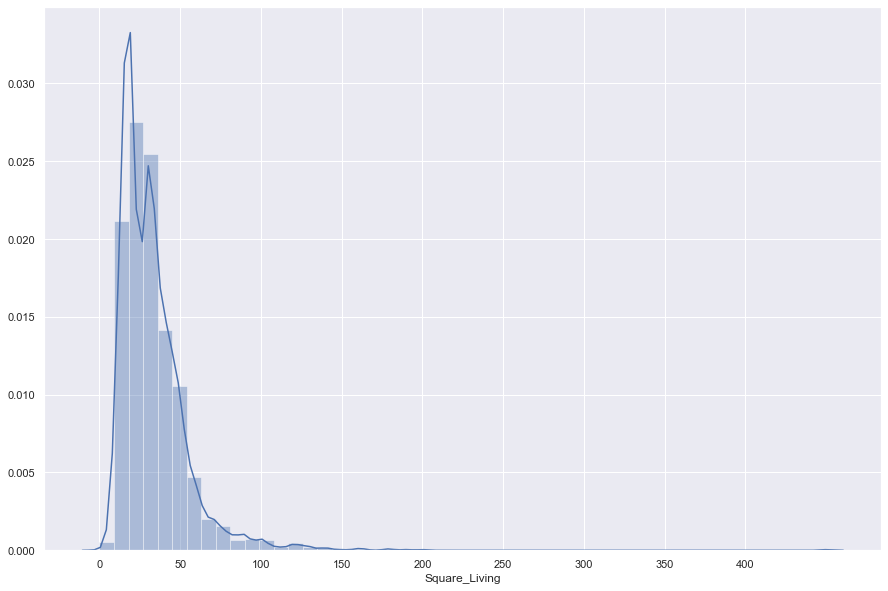

In [102]:
plot = sns.distplot(df['Square_Living'])
plot.set_xticks(np.arange(0, 450,50))
plt.show()

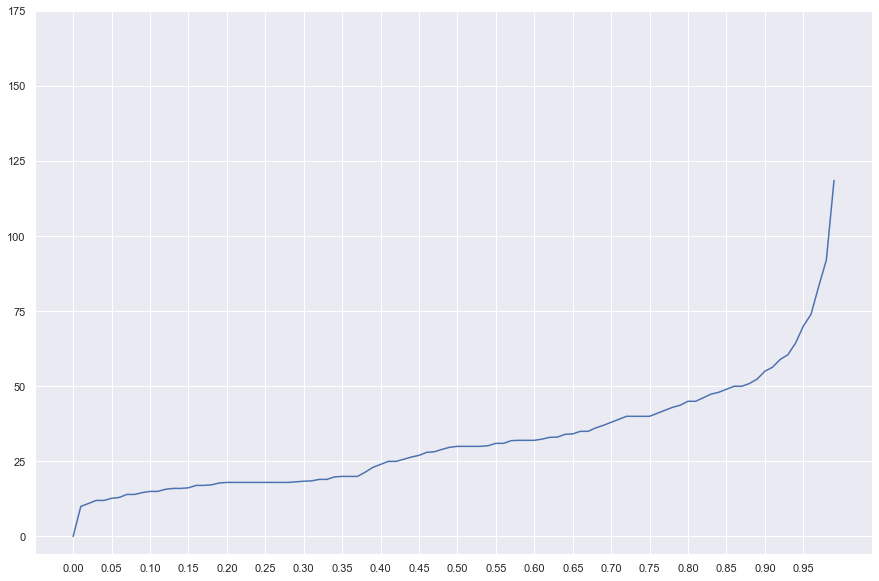

In [106]:
quantils = []
values = []

for i in np.arange(0, 1, 0.01):
    values.append(df['Square_Living'].quantile(i))
    quantils.append(i)

plot = sns.lineplot(quantils, values)
plot.set_xticks(np.arange(0, 1,0.05))
plot.set_yticks(np.arange(0, 200, 25));

Видно, что признаки, относящиеся к площади ведут себя в целом похожим образом. Все они содержат примерно 90% однородных данных и 10% различных выбросов.

In [64]:
df.columns.tolist()

['District',
 'Address',
 'Sales_Type',
 'Year_Building',
 'Material',
 'Floors_In_Building',
 'Floor',
 'Apartment_Type',
 'Price',
 'Square_Total',
 'Square_Living',
 'Square_Kitchen',
 'Rooms_Number',
 'Apartment_Condition',
 'Bathroom_Type',
 'Balcony_Loggia',
 'Date_Add',
 'Date_Expiration']

# Floors_In_Building

In [94]:
print('Missing values:', sum(df['Floors_In_Building'].isna()))
df['Floors_In_Building'].describe()

Missing values: 0


count    9935.000000
mean        8.224560
std         4.152664
min         1.000000
25%         5.000000
50%         9.000000
75%        10.000000
max        21.000000
Name: Floors_In_Building, dtype: float64

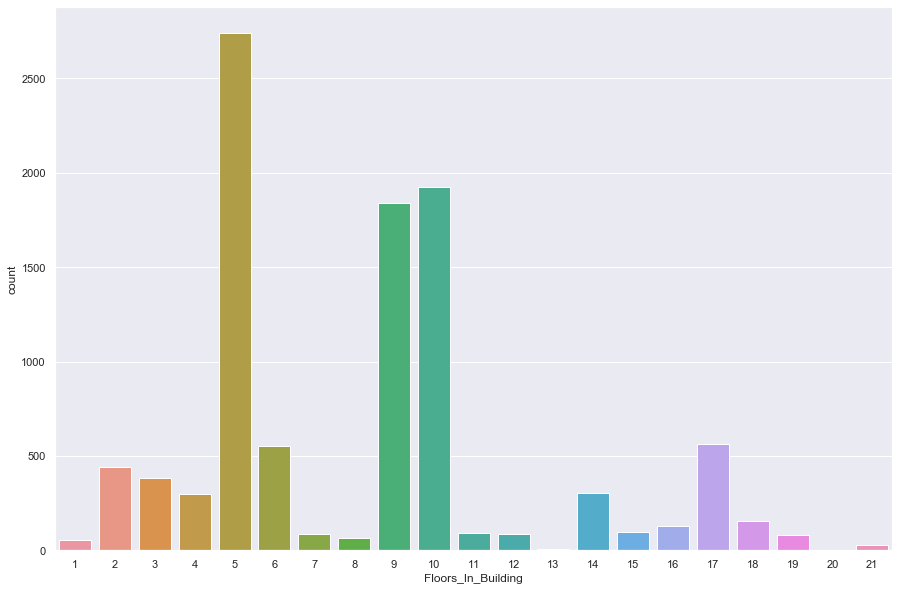

In [95]:
plot = sns.countplot(df['Floors_In_Building'])
plt.show()

Как видно из графика, чаще всего встречаются здания с 5, 9 и 10 этажами, что объясняется большим количеством домов 75 и 86 серий, а также так называемыми "хрущевками". 
<br>
Все эти дома в большинстве имели этажность 5, 9 и 10 этажей.

# Floor

In [50]:
print('Missing values:', sum(df['Floor'].isna()))
df['Floor'].describe()

Missing values: 0


count    9935.000000
mean        4.605234
std         3.359144
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        21.000000
Name: Floor, dtype: float64

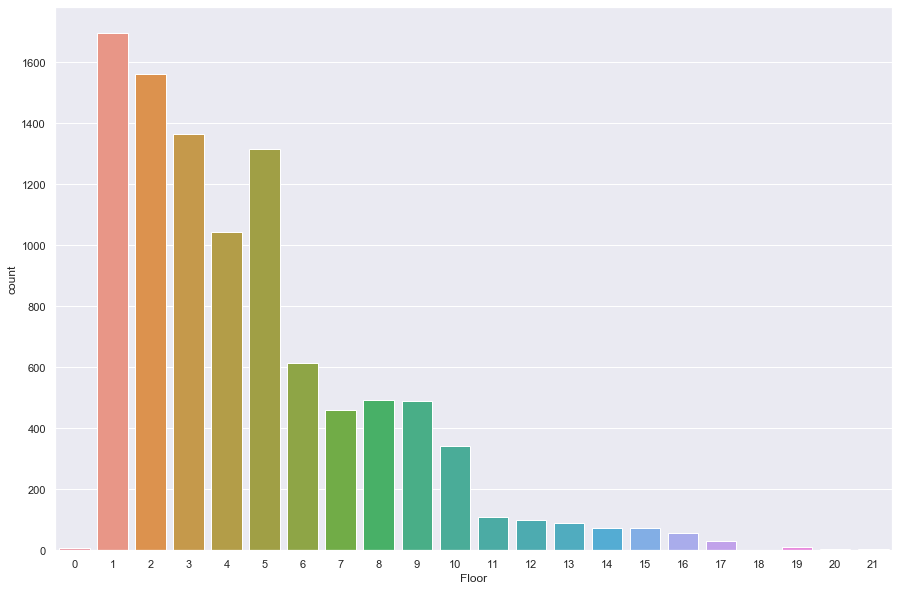

In [51]:
plot = sns.countplot(df['Floor'])
plt.show()

По графику видно, что с увеличением этажа расположения квартиры, они реже попадают в объявления о продаже. 
<br>
В дальнейшем предстоит разобраться с природой такого поведения.

# District

In [62]:
print('Missing values:', sum(df['District'].isna()))
print(df['District'].describe())
df['District'].value_counts()

Missing values: 0
count                  9935
unique                    4
top       октябрьский район
freq                   3151
Name: District, dtype: object


октябрьский район    3151
ленинский район      2487
советский район      2340
кировский район      1957
Name: District, dtype: int64

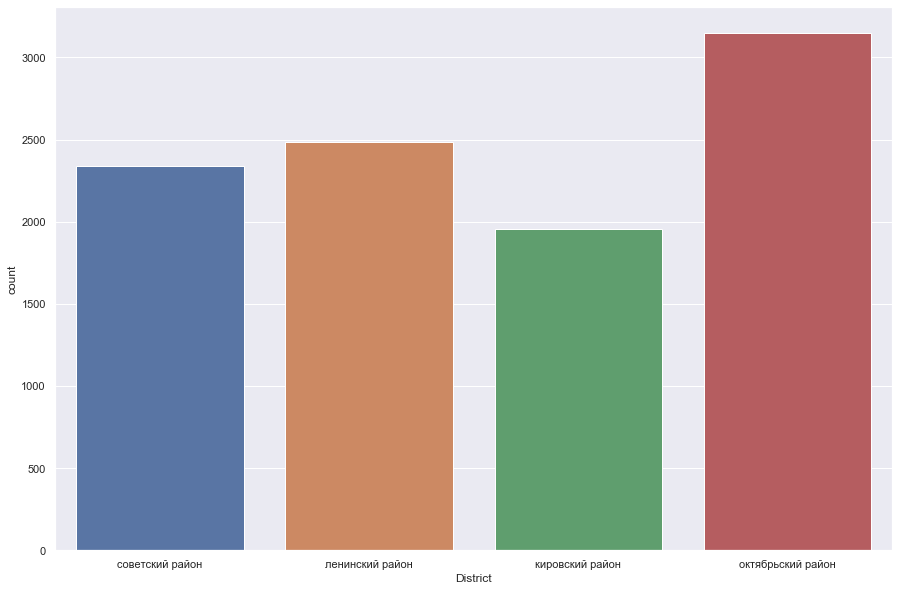

In [53]:
plot = sns.countplot(df['District'])
plt.show()

Квартиры чаще всего продаются в октябрьсокм районе, реже всего в кировском районе, у советского и ленинского примерное равенство.

# Year_Building

In [96]:
print('Missing values:', sum(df['Year_Building'].isna()))
df['Year_Building'].describe()

Missing values: 1421


count    8514.000000
mean     1990.221870
std        21.729621
min      1832.000000
25%      1975.000000
50%      1990.000000
75%      2010.000000
max      2020.000000
Name: Year_Building, dtype: float64

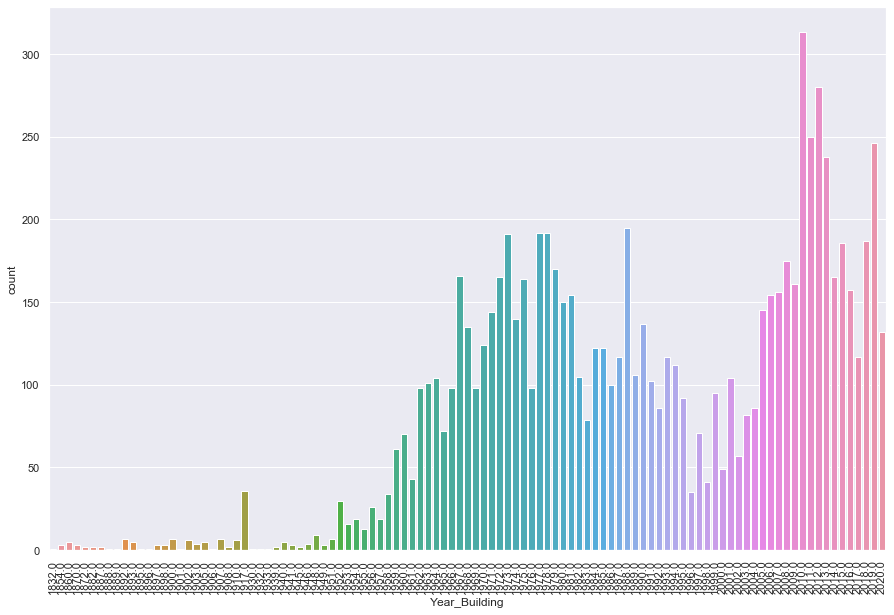

In [99]:
plot = sns.countplot(df['Year_Building'], )
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

На графике видно, что основная часть зданий была построена начиная от 1950 года. Возможно, здания построенные до 150 года стоит удалить из выборки.

In [83]:
df.columns.tolist()

['District',
 'Address',
 'Sales_Type',
 'Year_Building',
 'Material',
 'Floors_In_Building',
 'Floor',
 'Apartment_Type',
 'Price',
 'Square_Total',
 'Square_Living',
 'Square_Kitchen',
 'Rooms_Number',
 'Apartment_Condition',
 'Bathroom_Type',
 'Balcony_Loggia',
 'Date_Add',
 'Date_Expiration']

In [84]:
print('Missing values:', sum(df['Material'].isna()))
print(df['Material'].describe())
df['Material'].value_counts()

Missing values: 86
count       9849
unique         6
top       кирпич
freq        5935
Name: Material, dtype: object


кирпич          5935
панель          3153
монолит          332
дерево           309
шлакоблок        115
стеноблочный       5
Name: Material, dtype: int64

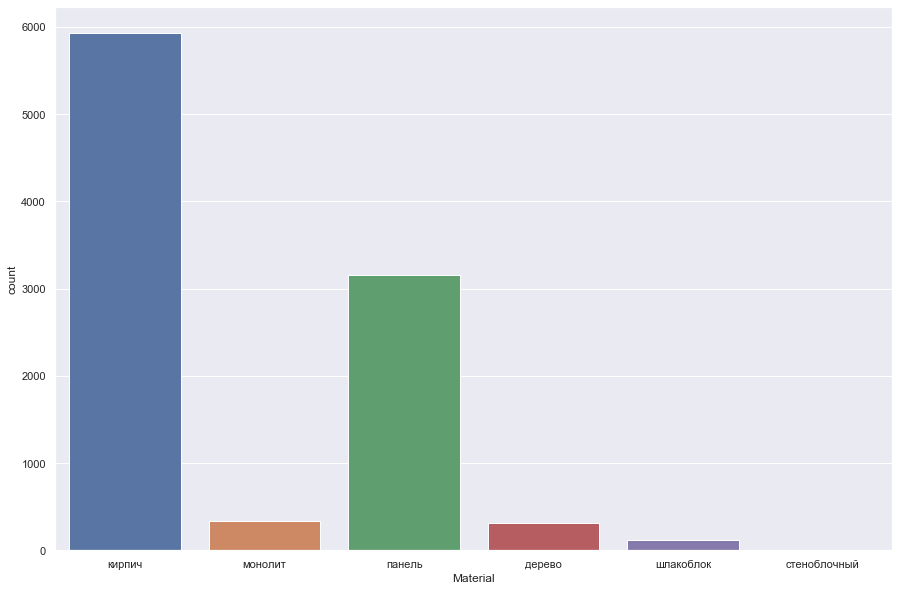

In [86]:
plot = sns.countplot(df['Material'])
plt.show()

По материалу зданий лидирует кирпич и панель, остальные материалы встречаются крайне редко. Возможно их стоит удалить из выборки.

In [87]:
print('Missing values:', sum(df['Apartment_Type'].isna()))
print(df['Apartment_Type'].describe())
df['Apartment_Type'].value_counts()

Missing values: 7992
count         1943
unique           6
top       гостинка
freq           949
Name: Apartment_Type, dtype: object


гостинка          949
секционка         425
малогабаритная    404
комната           106
двухуровневая      51
апартаменты         8
Name: Apartment_Type, dtype: int64

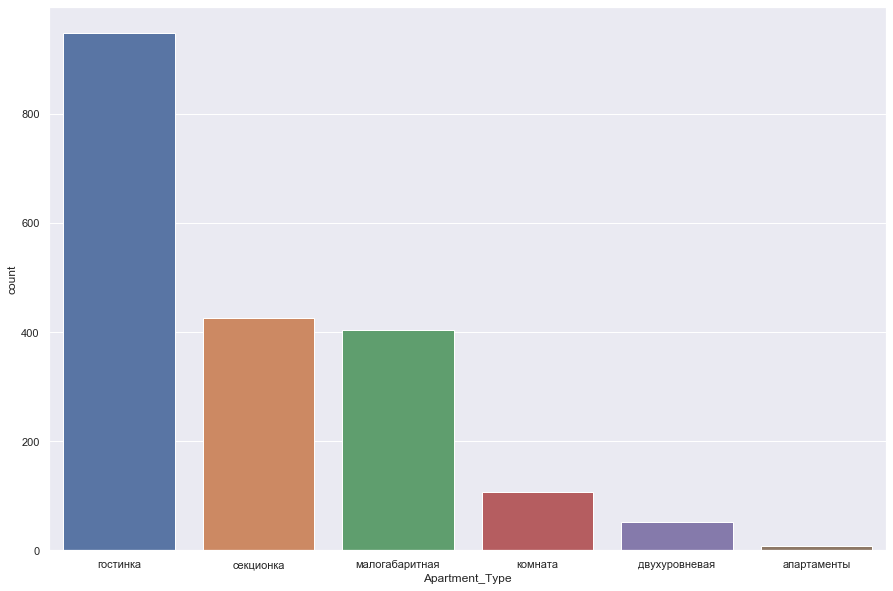

In [88]:
plot = sns.countplot(df['Apartment_Type'])
plt.show()

На основе имеющихся данных можно сделать вывод, что гостинка является наиболее часто встречающимся типом квартиры.
<br>
Однако, данный признак скорее характеризует особенность квартиры, а в случае если квартира обычная, то имеется пропуск.
<br>
В дальнейшем, после обработки пропущенных значений, стоит вернуться к данному графику.

# Rooms_Number

In [100]:
print('Missing values:', sum(df['Rooms_Number'].isna()))
print(df['Rooms_Number'].describe())
df['Rooms_Number'].value_counts()

Missing values: 0
count    9935.000000
mean        1.879316
std         0.936707
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Rooms_Number, dtype: float64


1    4325
2    3090
3    1992
4     464
5      54
6       8
7       1
9       1
Name: Rooms_Number, dtype: int64

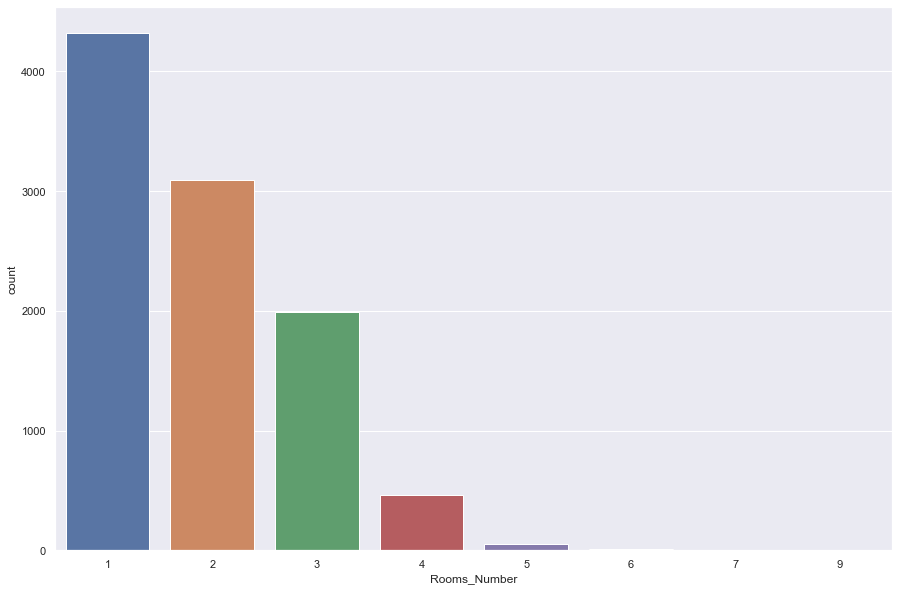

In [101]:
plot = sns.countplot(df['Rooms_Number'])
plt.show()

С количеством комнат все ожидаемо, чем больше комнат - тем реже продаются такие квартиры.

# Apartment_Condition

In [102]:
print('Missing values:', sum(df['Apartment_Condition'].isna()))
print(df['Apartment_Condition'].describe())
df['Apartment_Condition'].value_counts()

Missing values: 1564
count                    8371
unique                      4
top       в хорошем состоянии
freq                     4563
Name: Apartment_Condition, dtype: object


в хорошем состоянии     4563
в отличном состоянии    2650
требуется ремонт         771
черновая отделка         387
Name: Apartment_Condition, dtype: int64

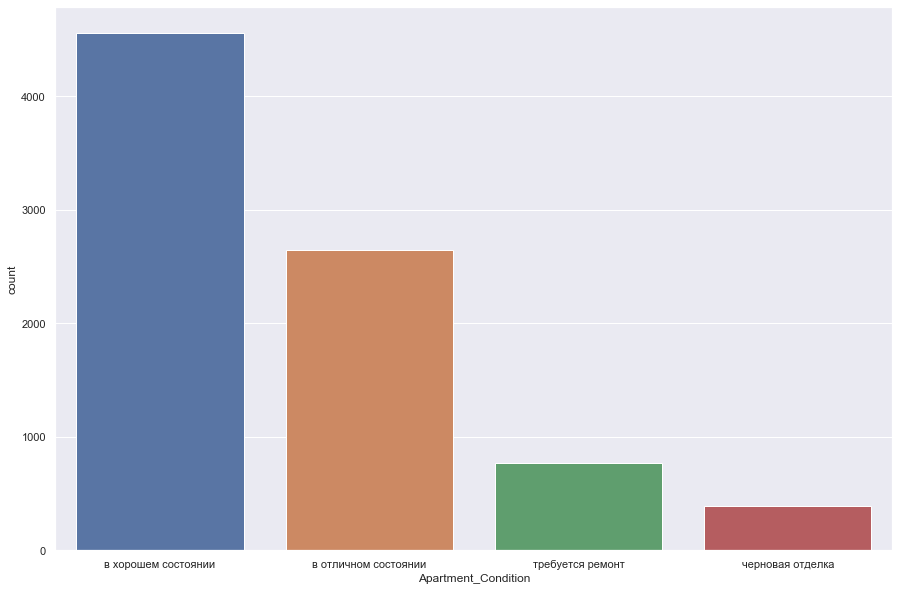

In [103]:
plot = sns.countplot(df['Apartment_Condition'])
plt.show()

Большая часть квартир продается в хорошем состоянии, следом идут квартиры в отличном состоянии. 
<br> 
В дальнейшем анализе предстоит проанализировать, как указанное состояние связано с ценой квартиры.

# Bathroom_Type

In [104]:
print('Missing values:', sum(df['Bathroom_Type'].isna()))
print(df['Bathroom_Type'].describe())
df['Bathroom_Type'].value_counts()

Missing values: 1191
count            8744
unique              2
top       совмещенный
freq             4663
Name: Bathroom_Type, dtype: object


совмещенный    4663
раздельный     4081
Name: Bathroom_Type, dtype: int64

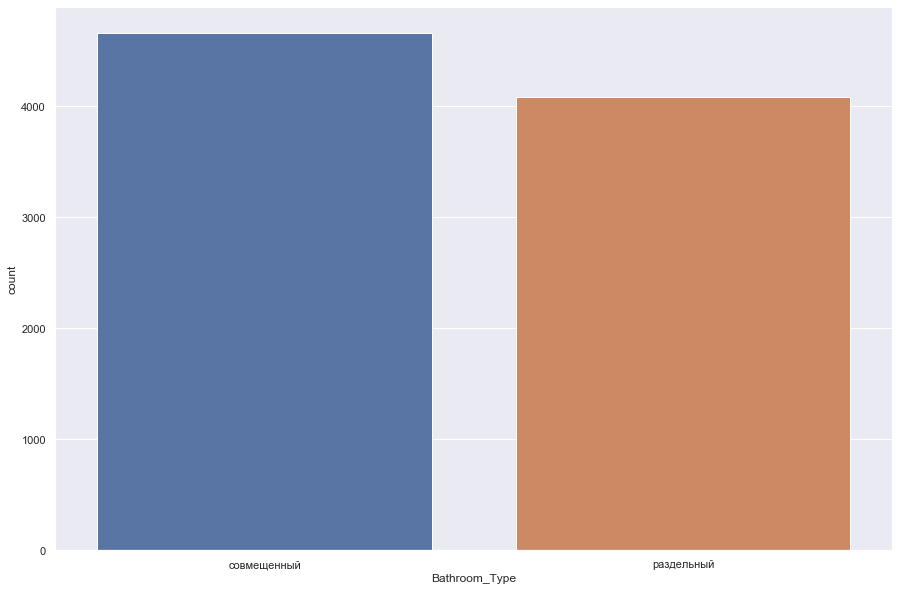

In [105]:
plot = sns.countplot(df['Bathroom_Type'])
plt.show()

Что касается типа санузла, то чаще всего встречается совмещенный санузел, хотя разница не настолько критична.

# Balcony_Loggia

In [106]:
print('Missing values:', sum(df['Balcony_Loggia'].isna()))
print(df['Balcony_Loggia'].describe())
df['Balcony_Loggia'].value_counts()

Missing values: 3508
count                   6427
unique                    10
top       лоджия, остекление
freq                    2448
Name: Balcony_Loggia, dtype: object


лоджия, остекление             2448
балкон, остекление             1914
балкон                         1030
2 лоджии, остекление            351
лоджия                          295
балкон и лоджия, остекление     192
2 балкона, остекление           103
2 балкона                        41
2 лоджии                         32
балкон и лоджия                  21
Name: Balcony_Loggia, dtype: int64

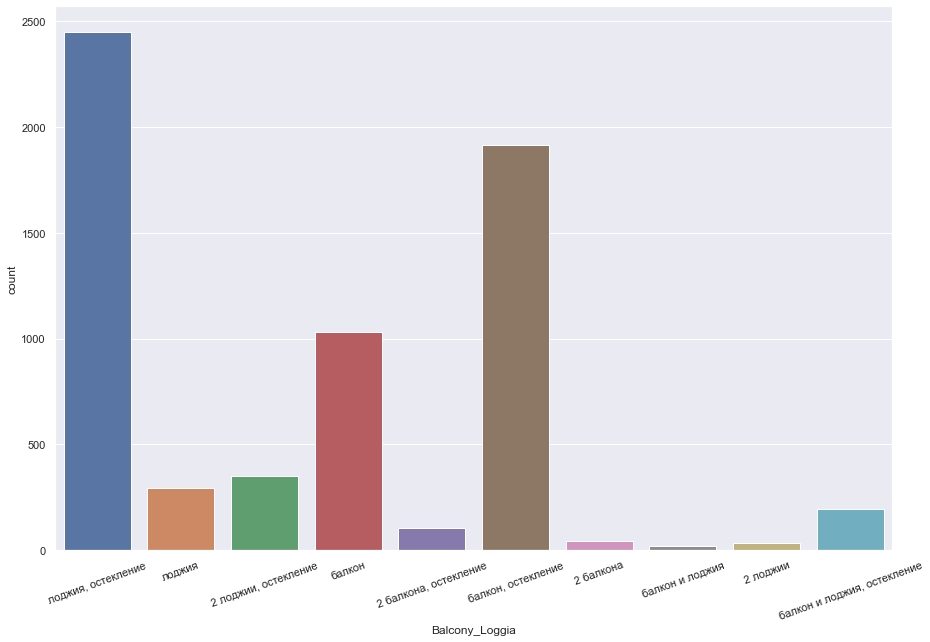

In [112]:
plot = sns.countplot(df['Balcony_Loggia'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=20)
plt.show()

# Address, Date_Add, Date_Expiration
Данные признаки не получится проанализировать в том виде, в котором они имеются сейчас.
<br>
Данные признаки будут использованы при попытке создания новых признаков (Feature Engeneering)